# Reaction-diffusion processes

## Random walks

In [2]:
import numpy as np
import networkx as nx
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# let us read and store an undirected network from a file
a=open("data/net1.txt","r")
G=nx.Graph()
for i in a:
    n=i.strip().split()
    G.add_edge(int(n[0]),int(n[1]))
a.close()

# let's plot the network
pos=nx.spring_layout(G) # this is the layout
# we can specify the labels of the nodes, we need to do that using dictionaries
labels={}
for i in G.nodes():
    labels[i]=i
    
# the plotting options are many
nx.draw_networkx_nodes(G,pos,node_color='Red',node_size=100,alpha=0.5)
nx.draw_networkx_edges(G, pos,width=1,edge_color="Black",alpha=1.0,arrowstyle='fancy')
nx.draw_networkx_labels(G,pos,labels,font_size=20)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/net1.txt'

In [ ]:
# let create a random walk function
import random as random

def random_walk(G,source,stop,t,nt):
    nt[t]=source # at time t the walker visits node "source"
    # the process ends after reaching a certain threshold
    if t<stop:
        # explore the neighbors
        neighbors=list(G.neighbors(source))
        # select one randomly
        target=neighbors[random.randint(0,len(neighbors)-1)]
        # move there using the same function
        random_walk(G,target,stop,t+1,nt)
    else:
        return 0

In [ ]:
stop=3
N=G.number_of_nodes()
# let us get a random source to start the process
source=random.randint(0,N-1)
nt=np.zeros(stop+1,int)
random_walk(G,source,stop,0,nt)
for i in range(stop+1):
    print ("at time t=",i," the walker is in node ",nt[i])

In [ ]:
# it is interesting to measure directly how many times a node is visited

def random_walk(G,source,stop,t,nt,visited):
    nt[t]=source # at time t the walker visits node "source"
    visited[source]+=1 # the node has been visited another time
    # the process ends after reaching a certain threshold
    if t<stop:
        # explore the neighbors
        neighbors=list(G.neighbors(source))
        # select one randomly
        target=neighbors[random.randint(0,len(neighbors)-1)]
        # move there using the same function
        random_walk(G,target,stop,t+1,nt,visited)
    else:
        return 0

In [ ]:
stop=10
N=G.number_of_nodes()
# let us get a random source to start the process
source=random.randint(0,N-1)
nt=np.zeros(stop+1,int)
visited=np.zeros(N,int)
random_walk(G,source,stop,0,nt,visited)
for i in range(stop+1):
    print (i,nt[i])
print (visited)

In [4]:
# another important quantity is the coverage: how many nodes
# visited at time t
def get_coverage(nt):
    coverage=np.zeros(nt.size,int)
    v=set()
    for i in range(nt.size):
        v.add(nt[i])
        coverage[i]=len(v) # at each time the coverage is the set up to t 
    return coverage

In [5]:
get_coverage(nt)

NameError: name 'nt' is not defined

In [6]:
# let us see another way to do it, without recursion
def random_walk2(G,source,stop,nt,visited):
    t=0
    while t<stop:
        visited[source]+=1
        nt[t]=source
        neighbors=list(G.neighbors(source))
        target=neighbors[random.randint(0,len(neighbors)-1)]
        source=target
        t+=1

In [7]:
stop=10
N=G.number_of_nodes()
source=random.randint(0,N-1)
visited=np.zeros(N,int)
nt=np.zeros(stop,int)
random_walk2(G,source,stop,nt,visited)

NameError: name 'G' is not defined

In [ ]:
for i in range(stop):
    print ("at time t =",i," the walker is in node ",nt[i])

In [8]:
print (visited)

NameError: name 'visited' is not defined

In [9]:
get_coverage(nt)

NameError: name 'nt' is not defined

In [ ]:
# let us try a larger network
a=open("data/BA.txt","r")
G=nx.Graph()
for i in a:
    n=i.strip().split()
    G.add_edge(int(n[0]),int(n[1]))
a.close()

In [10]:
N=G.number_of_nodes()
stop=10**5
source=random.randint(0,N-1)
visited=np.zeros(N,int)
nt=np.zeros(stop,int)
random_walk2(G,source,stop,nt,visited)

NameError: name 'G' is not defined

In [11]:
coverage=get_coverage(nt)

NameError: name 'nt' is not defined

In [ ]:
import matplotlib.pyplot as plt
%pylab inline

plt.plot(coverage,c="Red",linewidth=1.1, marker="o",alpha=0.5) 
plt.xlabel('t')
plt.ylabel('N(t)')
plt.show() 

In [12]:
# let us plot the number of times a node has been visited as a function 
# of the degree
# let us create degree classes
max_degree=0
for i in G.nodes():
    if G.degree(i)>max_degree:
        max_degree=G.degree(i) 

Nk=np.zeros(max_degree+1,int)
for i in G.nodes():
    Nk[G.degree(i)]+=1
        
        
histogram=np.zeros(max_degree+1,float)
for i in range(N):
    if G.degree(i)>0:
        histogram[G.degree(i)]+=visited[i]/Nk[G.degree(i)]

NameError: name 'G' is not defined

In [ ]:
plt.plot(histogram,c="Red",linewidth=1.1, marker="o",alpha=0.5) 
plt.xlabel('k')
plt.ylabel('<Visits(k)>')
plt.show() 

In [ ]:
def line(a,b,t):
    return a*t+b

x=np.zeros(max_degree+1,int)
for i in range(max_degree+1):
    x[i]=i
    
    
plt.plot(histogram,c="Red",linewidth=1.1, marker="o",alpha=0.5) 
plt.plot(x,line(2,25,x),c="Black",linewidth=4,alpha=0.5) 
plt.xlabel('k')
plt.ylabel('<Visits(k)>')
plt.show() 

In [ ]:
# let us consider W walkers
# initially each node has a fix number of walkers
average_W=5000
W=np.zeros(N,int)
for i in G.nodes():
    W[i]=average_W

In [ ]:
# now we need to let them diffuse
# since in each node we have more than one walker we need to 
# evaluate how many of them will move in each neighbor 
# we can use the multinomial
# how the multinomial works? 

# let us consider a list of probabilities
# 0 can happen with probability 0.1, 1 with prob 0.3, 2 with prob 0.5....
prob=[0.1,0.3,0.5,0.1]

np.random.multinomial(5, prob, size=1)

In [ ]:
output=np.random.multinomial(5, prob, size=1)
print (output)
c=0
for i in output[0]:
    print (c,i)
    c+=1

In [ ]:
# let us apply it to the random walkers
# now the concept of time will change
# we will implement a syncronous diffusion
# one fundamental time step correspond to a chance of all the walkers
# to move at the same time
# much faster convergence
def random_walk3(G,stop,W):
    t=0
    N=G.number_of_nodes()
    while t<stop:
        # temporary vector where to store who moves where at eact t
        temp=np.zeros(N,int)
        for source in G.nodes():
            # for each node we let diffuse the walkers out of it
            neighbors=list(G.neighbors(source))
            # we need to get the probabilities
            # we are assuming here that the probability of staying
            # in the intial node is 1-p=0
            # p could be in general the diffusion rate
            prob=[]
            degree=G.degree(source)
            for i in neighbors:
                prob.append(1./degree)
            # the probabilities are 1/k    
            output=np.random.multinomial(W[source], prob, size=1)
            # after calling the multinomial we know how to divide W(i)
            id=0
            for j in output[0]:
                temp[neighbors[id]]+=j
                id+=1
        # after the loop across all nodes
        # we update the values of W
        # note that this is correct just if p=1, as in this case
        for i in G.nodes():
            W[i]=temp[i]
        t+=1

In [ ]:
# let us call the function
stop=200
average_W=5000
W=np.zeros(N,int)
for i in G.nodes():
    W[i]=average_W
random_walk3(G,stop,W)

In [ ]:
# let us plot the number of walkers in each degree class k
# let us create degree classes
max_degree=0
for i in G.nodes():
    if G.degree(i)>max_degree:
        max_degree=G.degree(i) 
        
Nk=np.zeros(max_degree+1,int)
for i in G.nodes():
    Nk[G.degree(i)]+=1    
# let us plot avoiding the zeros        
histogram=np.zeros(max_degree+1,float)
toplot=set()
average_degree=0.
for i in range(N):
    average_degree+=float(G.degree(i))/N
    if G.degree(i)>0:
        histogram[G.degree(i)]+=W[i]/Nk[G.degree(i)]
        toplot.add(G.degree(i)) # this is the set with all the present 
                                # degrees
x2=[]
y2=[]
for i in toplot:
    x2.append(i)
    y2.append(histogram[i])    
 
# this comes from the theory!    
slope_line=average_W/average_degree   
    
plt.plot(x2,y2,c="Red",linewidth=1.1, marker="o",alpha=0.5) 
plt.plot(x,line(slope_line,0,x),c="Black",linewidth=4,alpha=0.5) 
plt.xlabel('k')
plt.ylabel('<W(k)>')
plt.show() 

In [13]:
# what about using a different d_kk'? 
# remember from the lecture a more realistic one is d_kk' ~ (kk')^(theta)
# let's create the weights first
def get_p_traveling(theta,G):
    dij={} # this a dictionary we use to compute the rate of travels from any pair ij
    for i in G.nodes():
        l=G.neighbors(i) # we compute the traveling rate to each neighbor
        summ=0.
        dij.setdefault(i,{})
        for j in l:
            # this the numerator of the dij
            w= (G.degree(i)*G.degree(j))**theta
            dij[i].setdefault(j,w)
            summ+=w  # this is the normalization factor: \sum_{j}wij

        for j in dij[i]:
            dij[i][j]=dij[i][j]/summ
    return dij

# let us change a bit the random walk function to account for this dij
def random_walk4(G,stop,dij,p,W):
    t=0
    N=G.number_of_nodes()
    while t<stop:
        # temporary vector where to store who moves where at eact t
        temp=np.zeros(N,int)
        temp2=np.zeros(N,int)
        for source in G.nodes():
            # for each node we let diffuse the walkers out of it
            neighbors=list(G.neighbors(source))
            # we need to get the probabilities
            # now p is not 1!!
            prob=[]
            for j in neighbors:
                prob.append(p*dij[source][j])  # with prob p they travel to j with prob p*d_ij
            # with prob 1-p they stay
            prob.append(1.-p)
            output=np.random.multinomial(W[source], prob, size=1)
            # after calling the multinomial we know how to divide W(i)
            id=0
            for j in range(len(output[0])-1):
                temp[neighbors[id]]+=output[0][j] # these are the traveling in
                id+=1 
            temp2[source]=output[0][-1] # these are those staying in source
        # after the loop across all nodes
        # we update the values of W
        for i in G.nodes():
            W[i]=temp[i]+temp2[i]  #since p!=0, this is given by those than arrive plus those that stayed 
            
        t+=1

In [14]:
stop=200
average_W=5000
W=np.zeros(N,int)
p=0.5
theta=0.5

dij=get_p_traveling(theta,G)

for i in G.nodes():
    W[i]=average_W
random_walk4(G,stop,dij,p,W)

NameError: name 'N' is not defined

In [ ]:
max_degree=0
for i in G.nodes():
    if G.degree(i)>max_degree:
        max_degree=G.degree(i) 
        
Nk=np.zeros(max_degree+1,int)
for i in G.nodes():
    Nk[G.degree(i)]+=1    
# let us plot avoiding the zeros        
histogram=np.zeros(max_degree+1,float)
toplot=set()
average_degree=0.
for i in range(N):
    average_degree+=float(G.degree(i)**(1+theta))/N  # this is not really the average but the 1+theta moment!
    if G.degree(i)>0:
        histogram[G.degree(i)]+=W[i]/Nk[G.degree(i)]
        toplot.add(G.degree(i)) # this is the set with all the present 
                                # degrees
x2=[]
y2=[]
for i in toplot:
    x2.append(i)
    y2.append(histogram[i])    
 
# this comes from the theory!    
slope_line=average_W/average_degree   
    
plt.plot(x2,y2,c="Red",linewidth=1.1, marker="o",alpha=0.5) 
plt.plot(x,line(slope_line,0,x**(1+theta)),c="Black",linewidth=4,alpha=0.5) 
plt.xlabel('k')
plt.ylabel('<W(k)>')
plt.show() 

In [15]:
# all the above accounts for the diffusion across patches
# what about the reaction? inside we use the classic SIR

def SIR_hm(beta,mu,N,status):
    p_1=0.
    delta_1=0.
    delta_2=0.
    
    p_1=beta*float(status[1])/N  ## P(S-->I) 
    p_2=mu                      ## P(I--->R)       

    if p_1>0.:
        # binomial extraction to identify the number of infected people going to I given p_1
        delta_1=binomial(status[0], p_1)
        
    if status[2]!=0:
        delta_2=binomial(status[1],p_2)

    # update the compartments
    status[0]-= delta_1

    status[1]+= delta_1
    status[1]-= delta_2
    
    status[2]+= delta_2 # R is id=2
    
    return 0

In [ ]:
# at each time step first we have the diffusion of people in each compartment
# then we have a reaction with the updated population

In [16]:
# let us take a network
N=1000
m=2
G=nx.barabasi_albert_graph(N,m)

# let assign V people to each subpopulation
average_V=5000
V=np.zeros(N,int)
for i in G.nodes():
    V[i]=average_V

# inside each subpopulation people are divided in compartments S,I,R
# let's create a dictionary with the compartments
compartments={}
compartments[0]='S'
compartments[1]='I'
compartments[2]='R'
# that that this could be read from file
# then let's create a dictionary for each subpop that tell us how many people in each compartment are there


status_subpop={}
for i in G.nodes():
    status_subpop.setdefault(i,np.zeros(3,int))
    for j in compartments:
        if compartments[j]=='S': # initially they are all S
            status_subpop[i][j]=V[i]
        else:
            status_subpop[i][j]=0
    
# now we need to select the subpopulation that are initially seeded
# let's select a random fraction of s as initially seeded

s=1./N # let's select only one in the first example
n_of_infected=int(s*N)
# we get the list of nodes and shuffle it
list_subpop=[]
for i in range(N):
    list_subpop.append(i)
shuffle(list_subpop)

# now let's add a number of infected people in the selected subpopulation
for i in range(n_of_infected):
    seed_subpop=list_subpop[i]
    # for each initial seed we need to change the subpop distribution
    for j in compartments:
        if compartments[j]=='S': # we remove 10 people
            status_subpop[seed_subpop][j]-=10
        if compartments[j]=='I': # we make them infected!
            status_subpop[seed_subpop][j]+=10
            
# let's check if it works
for i in G.nodes():
    if status_subpop[i][1]!=0:
        print (i,list_subpop[0])
# this is exactly what we need!
# so let's create a function that does all of this

339 339


In [17]:
def ini_subpop(average_V,s,x):
    # let assign V people to each subpopulation
    V=np.zeros(N,int)
    for i in G.nodes():
        V[i]=average_V

    # inside each subpopulation people are divided in compartments S,I,R
    # let's create a dictionary with the compartments
    compartments={}
    compartments[0]='S'
    compartments[1]='I'
    compartments[2]='R'
    # that that this could be read from file
    # then let's create a dictionary for each subpop that tell us how many people in each compartment are there


    status_subpop={}
    for i in G.nodes():
        status_subpop.setdefault(i,np.zeros(3,int))
        for j in compartments:
            if compartments[j]=='S': # initially they are all S
                status_subpop[i][j]=V[i]
            else:
                status_subpop[i][j]=0

    # now we need to select the subpopulation that are initially seeded
    # let's select a random fraction of s as initially seeded


    n_of_infected=int(s*N)
    # we get the list of nodes and shuffle it
    list_subpop=[]
    for i in range(N):
        list_subpop.append(i)
    shuffle(list_subpop)

    # now let's add a number of infected people in the selected subpopulation
    for i in range(n_of_infected):
        seed_subpop=list_subpop[i]
        # for each initial seed we need to change the subpop distribution
        for j in compartments:
            if compartments[j]=='S': # we remove 10 people
                status_subpop[seed_subpop][j]-=x
            if compartments[j]=='I': # we make them infected!
                status_subpop[seed_subpop][j]+=x
            
    return status_subpop

In [18]:
N=1000
m=2
G=nx.barabasi_albert_graph(N,m)

average_v=5000
s=1./N
x=10

# this is our function!
status_subpop = ini_subpop(average_V,s,x)

# let's now get the travel probs
p=0.5
theta=0.5
dij=get_p_traveling(theta,G)

# let's define R0 for the disease
beta=0.5
mu=0.1


# now we have everything to make the reaction-diffusion process
t_max=20
for t in range(t_max):
    # at each iteration the first thing is to make people travel
    # we make each compartment travel separately
    for j in compartments:
        people_traveling=np.zeros(N,int) # this is the vector of people traveling in comp j
        for k in G.nodes():
            people_traveling[k]+=status_subpop[k][j]
            
        # we then call the random walk function for 1 time step
        random_walk4(G,1,dij,p,people_traveling)
        # we update the populations given the travels
        for k in G.nodes():
            status_subpop[k][j]=people_traveling[k]
            
    # let's see if it works
    # the pop of node i should get close to ave*k_i^(1+theta)/<k^(1+\theta)>
    average_degree=0.
    for i in range(N):
        average_degree+=float(G.degree(i)**(1+theta))/N
    
    id_check=0
    print (status_subpop[id_check][0],average_v*G.degree(id_check)**(1+theta)/average_degree)

33287 67006.92704830674
45572 67006.92704830674
51227 67006.92704830674
54632 67006.92704830674
57398 67006.92704830674
59549 67006.92704830674
60988 67006.92704830674
62373 67006.92704830674
63845 67006.92704830674
64947 67006.92704830674
65394 67006.92704830674
66269 67006.92704830674
66594 67006.92704830674
67332 67006.92704830674
67558 67006.92704830674
67725 67006.92704830674
67668 67006.92704830674
68066 67006.92704830674
68151 67006.92704830674
68391 67006.92704830674


In [19]:
# great, so let's add the missing piece
N=1000
m=2
G=nx.barabasi_albert_graph(N,m)

average_v=5000
s=1./N
x=10

# this is our function!
status_subpop = ini_subpop(average_V,s,x)

# let's now get the travel probs
p=0.5
theta=0.5
dij=get_p_traveling(theta,G)

# let's define R0 for the disease
beta=0.5
mu=0.1


# now we have everything to make the reaction-diffusion process
t_max=20
for t in range(t_max):
    # at each iteration the first thing is to make people travel
    # we make each compartment travel separately
    for j in compartments:
        people_traveling=np.zeros(N,int) # this is the vector of people traveling in comp j
        for k in G.nodes():
            people_traveling[k]+=status_subpop[k][j]
            
        # we then call the random walk function for 1 time step
        random_walk4(G,1,dij,p,people_traveling)
        # we update the populations given the travels
        for k in G.nodes():
            status_subpop[k][j]=people_traveling[k]
            
    # after the traveling we can call the SIR model in each subpopulation
    
    for k in G.nodes():
        tot_pop=0 # we need to know how many people are living in each subpop
        inf=0     # also we run the SIR just if there are infected
        for j in compartments:
            tot_pop+=status_subpop[k][j]
            if j==1:
                inf=status_subpop[k][j]
        if inf>0:
            SIR_hm(beta,mu,tot_pop,status_subpop[k]) # note how we are passing status_subpop[k] to the function
    #let's see how many diseased subpopulation we have
    disease_sub_pop=0
    for k in G.nodes():
        if status_subpop[k][1]>0:
                disease_sub_pop+=1
    print (t,disease_sub_pop)

0 2
1 5
2 9
3 19
4 27
5 42
6 61
7 96
8 133
9 175
10 244
11 333
12 439
13 541
14 660
15 754
16 854
17 926
18 962
19 993


In [20]:
# let's convert all of this into a function

def metapop(t_max,N,compartments,status_subpop,G,beta,mu,p,theta,dij):
    
    diseased={} # for each t let's save the number of diseased subpop
    prevalence={} # for each t let's save the number of infected people
    for t in range(t_max):
        # at each iteration the first thing is to make people travel
        # we make each compartment travel separately
        for j in compartments:
            people_traveling=np.zeros(N,int) # this is the vector of people traveling in comp j
            for k in G.nodes():
                people_traveling[k]+=status_subpop[k][j]

            # we then call the random walk function for 1 time step
            random_walk4(G,1,dij,p,people_traveling)
            # we update the populations given the travels
            for k in G.nodes():
                status_subpop[k][j]=people_traveling[k]

        # after the traveling we can call the SIR model in each subpopulation

        for k in G.nodes():
            tot_pop=0 # we need to know how many people are living in each subpop
            inf=0     # also we run the SIR just if there are infected
            for j in compartments:
                tot_pop+=status_subpop[k][j]
                if j==1:
                    inf=status_subpop[k][j]
            if inf>0:
                SIR_hm(beta,mu,tot_pop,status_subpop[k]) # note how we are passing status_subpop[k] to the function
        #let's see how many diseased subpopulation we have
        disease_sub_pop=0
        tot_inf=0.
        for k in G.nodes():
            if status_subpop[k][1]>0:
                    disease_sub_pop+=1
                    tot_inf+=status_subpop[k][1]
        diseased[t]=disease_sub_pop
        prevalence[t]=tot_inf
        
    return diseased, prevalence

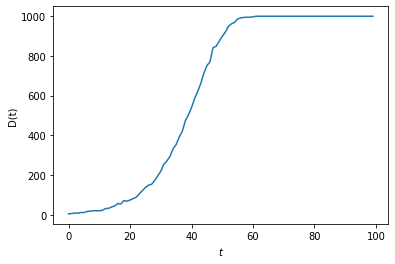

In [21]:
N=1000
m=2
G=nx.barabasi_albert_graph(N,m)

average_v=5000
s=1./N
x=10

# this is our function!
status_subpop = ini_subpop(average_V,s,x)

# let's now get the travel probs
p=0.5
theta=0.5
dij=get_p_traveling(theta,G)

# let's define R0 for the disease
beta=0.15
mu=0.1
t_max=100

diseased, prevalance = metapop(t_max,N,compartments,status_subpop,G,beta,mu,p,theta,dij)


y=[]
for i in diseased:
    y.append(diseased[i])
plt.plot(y)
plt.xlabel('$t$')
plt.ylabel('D(t)')
plt.show()

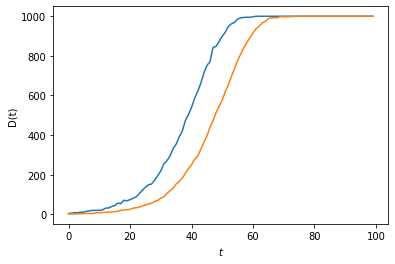

In [22]:
# what happnes we change p?

status_subpop = ini_subpop(average_V,s,x)

# let's now get the travel probs
p=0.1
theta=0.5
dij=get_p_traveling(theta,G)

# let's define R0 for the disease
beta=0.15
mu=0.1
t_max=100

diseased, prevalance = metapop(t_max,N,compartments,status_subpop,G,beta,mu,p,theta,dij)


y2=[]
for i in diseased:
    y2.append(diseased[i])
plt.plot(y)
plt.plot(y2)
plt.xlabel('$t$')
plt.ylabel('D(t)')
plt.show()

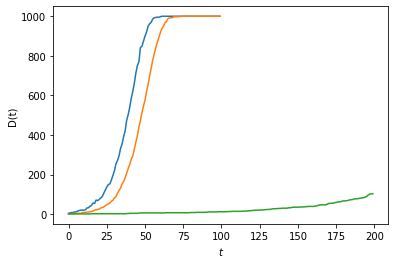

In [23]:
# what happnes we change p?

status_subpop = ini_subpop(average_V,s,x)

# let's now get the travel probs
p=0.0001
theta=0.5
dij=get_p_traveling(theta,G)

# let's define R0 for the disease
beta=0.15
mu=0.1
t_max=200

diseased, prevalance = metapop(t_max,N,compartments,status_subpop,G,beta,mu,p,theta,dij)


y3=[]
for i in diseased:
    y3.append(diseased[i])
plt.plot(y)
plt.plot(y2)
plt.plot(y3)
plt.xlabel('$t$')
plt.ylabel('D(t)')
plt.show()

In [ ]:
# even very small values still allow the disease to spread!
# what was the threshold?

$$p \bar{N} >  \frac{{\langle k^{1+\theta} \rangle^2}}{\langle k^{2+2\theta}\rangle-\langle k^{1+2\theta}\rangle }\frac{R_0^2}{2(R_0-1)^2} \mu $$

In [24]:
# let get the value
moment_1_theta=0.
moment_2_2theta=0.
moment_1_2theta=0.
for i in range(N):
        moment_1_theta+=float(G.degree(i)**(1+theta))/N
        moment_2_2theta+=float(G.degree(i)**(2+2*theta))/N
        moment_1_2theta+=float(G.degree(i)**(1+2*theta))/N
R0=beta/mu
thre=mu*(R0**2/(2*(R0-1)**2))*moment_1_theta**2./(moment_2_2theta-moment_1_2theta)
print (thre/average_v)

1.0231850395296737e-05


In [25]:
# what happens if we change the topology?
# what's the average degree?
print (2*G.number_of_edges()/G.number_of_nodes())

3.992


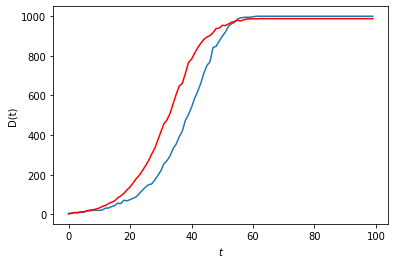

In [26]:
N=1000
p_val=(2.*G.number_of_edges()/G.number_of_nodes()**2)
G=nx.erdos_renyi_graph(N,p_val)

average_v=5000
s=1./N
x=10

# this is our function!
status_subpop = ini_subpop(average_V,s,x)

# let's now get the travel probs
p=0.5
theta=0.5
dij=get_p_traveling(theta,G)

# let's define R0 for the disease
beta=0.15
mu=0.1
t_max=100

diseased, prevalance = metapop(t_max,N,compartments,status_subpop,G,beta,mu,p,theta,dij)


y_er=[]
for i in diseased:
    y_er.append(diseased[i])
plt.plot(y)
plt.plot(y_er,color='Red')
plt.xlabel('$t$')
plt.ylabel('D(t)')
plt.show()

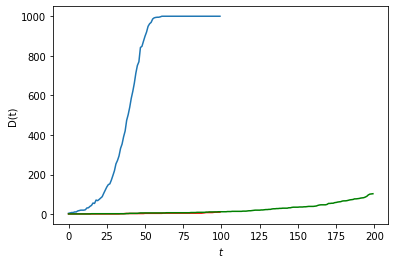

In [27]:
# let's reduce p
status_subpop = ini_subpop(average_V,s,x)

# let's now get the travel probs
p=0.0001
theta=0.5
dij=get_p_traveling(theta,G)

# let's define R0 for the disease
beta=0.15
mu=0.1
t_max=100

diseased, prevalance = metapop(t_max,N,compartments,status_subpop,G,beta,mu,p,theta,dij)


y_er=[]
for i in diseased:
    y_er.append(diseased[i])
plt.plot(y)
plt.plot(y_er,color='Red')
plt.plot(y3,color='Green')
plt.xlabel('$t$')
plt.ylabel('D(t)')
plt.show()

In [28]:
# this is the effect of heterogeneity!